In [1]:
from data.mysqls import BancoDeDados
import pandas as pd
from utils.psymeet import PsyMeet
from matplotlib import pyplot as plt
from wordcloud import WordCloud


In [2]:
PsyMeet().scrape()

In [3]:
# Ler o json e transformar em um dataframe
df = pd.read_json('data/psicologos.json')

# Inicializar listas para armazenar os dados
crps = []
nomes = []
links = []
especialidades_list = []
sexos = []
estados = []

# Percorrer todo o df e ler e salvar os dados de forma de tabela
for index, row in df.iterrows():
    elemento  =  row[0]
    crps.append(elemento['crp'])
    nomes.append(elemento['nome'])
    links.append(elemento['link'])
    especialidades_list.append(elemento['especialidades'])
    sexos.append(elemento['sexo'])
    estados.append(elemento['estado'])

# Criar um novo DataFrame a partir dos dados extraídos
dados = pd.DataFrame({
    'crp': crps,
    'nome': nomes,
    'link': links,
    'especialidades': especialidades_list,
    'sexo': sexos,
    'estado': estados
})


    

C:\Users\arthu\AppData\Local\Temp\ipykernel_6304\3826522676.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elemento  =  row[0]


In [4]:
dados.head()
dados.describe()

,crp,nome,link,especialidades,sexo,estado
count,1600,1600,1600,1600,1600,1600
unique,1068,1068,1068,1008,2,25
top,05/45909,Rachel da Silva Ribeiro Barreto,https://www.psymeetsocial.com/psicologo/rachel...,"[Ansiedade, Depressão, Relacionamentos, Angúst...",F,SP
freq,2,2,2,25,1140,526


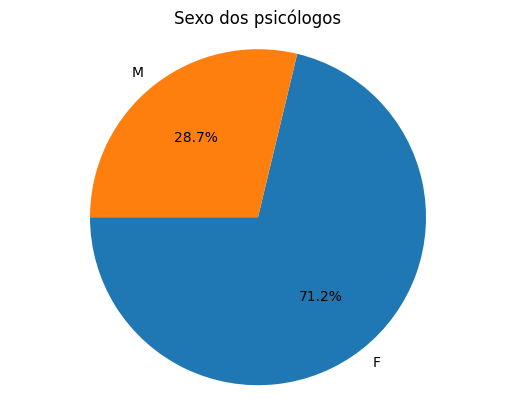

In [5]:
valores_sexos = dados['sexo'].value_counts()
labels = valores_sexos.index
sizes = valores_sexos.values
fig1, ax1 = plt.subplots()
plt.title('Sexo dos psicólogos')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
ax1.axis('equal')
plt.show()


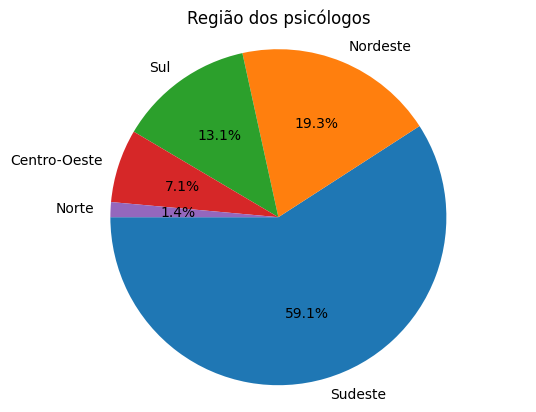

In [6]:
regioes = {
    'Norte': ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

dados['regiao'] = dados['estado'].apply(lambda x: [key for key, value in regioes.items() if x in value][0])
valores_regioes = dados['regiao'].value_counts()
labels = valores_regioes.index
sizes = valores_regioes.values
fig1, ax1 = plt.subplots()
plt.title('Região dos psicólogos')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
ax1.axis('equal')
plt.show()


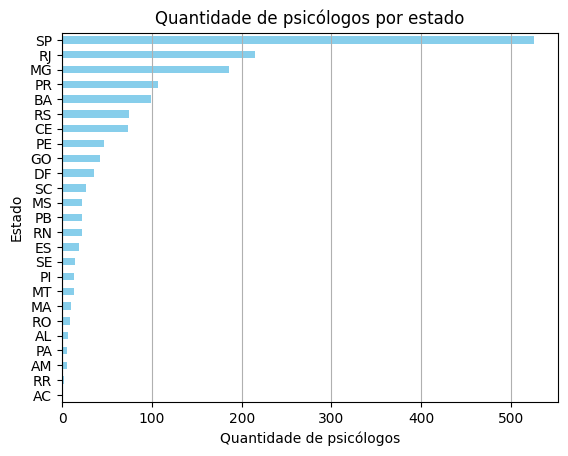

In [7]:
valores_estados = dados['estado'].value_counts()
#colocar mais cores
valores_estados.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.title('Quantidade de psicólogos por estado')
plt.xlabel('Quantidade de psicólogos')
plt.ylabel('Estado')
plt.show()



In [8]:
def wordcloud_especialidades(dados):
    texto = ''
    for index, row in dados.iterrows():
        for item in row['especialidades']:
            item = item.lower().split(' ')
            item = '_'.join(item)
            texto += item + ' '

    wordcloud = WordCloud(width=800, height=600, max_font_size=110, collocations=False).generate(texto)
    plt.figure(figsize=(14, 7))
    plt.title('Especialidades dos psicólogos')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def value_counts_especialidades(dados):
    especialidades = []
    for index, row in dados.iterrows():
        for item in row['especialidades']:
            especialidades.append(item)
    return pd.Series(especialidades).value_counts()



WordCloud das especialidades do sexo feminino

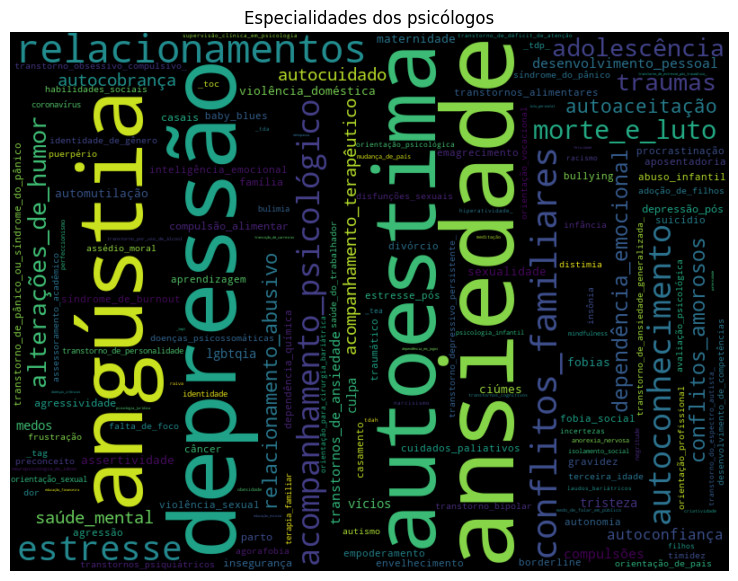

Ansiedade          1059
Depressão           925
Angústia            851
Autoestima          775
Relacionamentos     744
Name: count, dtype: int64

In [9]:
#fazer wordcloud com as especialidades baseado no sexo
dados_F = dados[dados['sexo'] == 'F']
wordcloud_especialidades(dados_F)
value_counts_especialidades(dados_F).head(5)


 WordCloud do sexo Masculino

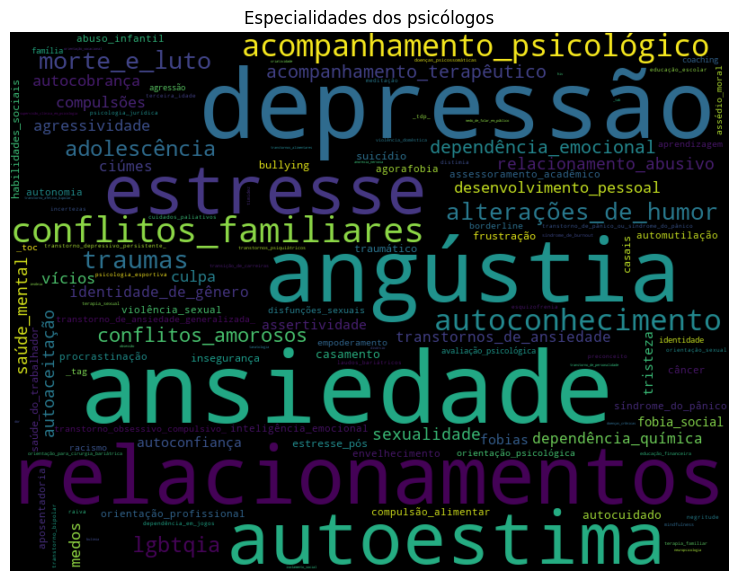

Ansiedade          408
Depressão          377
Angústia           310
Relacionamentos    287
Autoestima         245
Name: count, dtype: int64

In [10]:
dados_M = dados[dados['sexo'] == 'M']
wordcloud_especialidades(dados_M)
value_counts_especialidades(dados_M).head(5)